### 数据集

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from sklearn.datasets import load_digits
digits = load_digits()
x = digits.data
y = digits.target

In [9]:
x.shape,y.shape

((1797, 64), (1797,))

In [11]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 86)

### PCA降维

In [18]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA()
# 创建PCA对象（默认保留所有主成分）
pca.fit(x_train)
# 使用训练集数据拟合PCA模型，计算主成分

PCA()

In [26]:
pca.explained_variance_
# 属性输出每个主成分的方差值，反映主成分对数据方差的解释程度
# 方差越大主成分包含的信息就越多

array([1.81753639e+02, 1.61916145e+02, 1.40023566e+02, 1.00942179e+02,
       6.97472277e+01, 5.92910368e+01, 5.26787210e+01, 4.41417500e+01,
       4.14245541e+01, 3.63276029e+01, 2.81037848e+01, 2.66766752e+01,
       2.25882635e+01, 2.12496726e+01, 1.80237529e+01, 1.70768190e+01,
       1.59020738e+01, 1.52122366e+01, 1.22606200e+01, 1.10264396e+01,
       1.06517054e+01, 9.71691291e+00, 9.20846752e+00, 8.96131332e+00,
       8.10254732e+00, 7.12556262e+00, 6.66842121e+00, 6.23067046e+00,
       5.73033136e+00, 5.03977264e+00, 4.69042454e+00, 4.30556908e+00,
       4.08067555e+00, 3.94026318e+00, 3.52637680e+00, 3.44439022e+00,
       3.01376845e+00, 2.73141469e+00, 2.70570250e+00, 2.41849610e+00,
       2.28914897e+00, 1.82914897e+00, 1.78283872e+00, 1.72042540e+00,
       1.36958432e+00, 1.29543273e+00, 1.11561980e+00, 8.16615670e-01,
       5.94093854e-01, 4.83964014e-01, 2.62742884e-01, 9.59419592e-02,
       6.42821731e-02, 6.03675074e-02, 1.11142887e-02, 8.69289264e-03,
      

In [44]:
pca.explained_variance_ratio_
# pca.explained_variance_ratio_本身就是按照从大到小的顺序排序的

array([1.51150682e-01, 1.34653347e-01, 1.16446954e-01, 8.39459358e-02,
       5.80034664e-02, 4.93078474e-02, 4.38088871e-02, 3.67093374e-02,
       3.44496521e-02, 3.02109053e-02, 2.33717810e-02, 2.21849625e-02,
       1.87849413e-02, 1.76717371e-02, 1.49889849e-02, 1.42014920e-02,
       1.32245457e-02, 1.26508606e-02, 1.01962255e-02, 9.16985150e-03,
       8.85821350e-03, 8.08081768e-03, 7.65798231e-03, 7.45244295e-03,
       6.73827257e-03, 5.92578867e-03, 5.54561892e-03, 5.18157490e-03,
       4.76548091e-03, 4.19119573e-03, 3.90066948e-03, 3.58061445e-03,
       3.39358760e-03, 3.27681730e-03, 2.93261948e-03, 2.86443747e-03,
       2.50632208e-03, 2.27150992e-03, 2.25012705e-03, 2.01127933e-03,
       1.90371116e-03, 1.52116413e-03, 1.48265141e-03, 1.43074700e-03,
       1.13897915e-03, 1.07731291e-03, 9.27776163e-04, 6.79117165e-04,
       4.94062689e-04, 4.02476075e-04, 2.18503280e-04, 7.97876330e-05,
       5.34585959e-05, 5.02030661e-05, 9.24290885e-06, 7.22921788e-06,
      

In [46]:
ratio_cum = np.cumsum(pca.explained_variance_ratio_)
# np.cumsum是Numpy库中的函数，用于计算数组元素的累积求和
# 即从数组开头到当前位置元素的逐步累加
ratio_cum

array([0.15115068, 0.28580403, 0.40225098, 0.48619692, 0.54420039,
       0.59350823, 0.63731712, 0.67402646, 0.70847611, 0.73868701,
       0.7620588 , 0.78424376, 0.8030287 , 0.82070044, 0.83568942,
       0.84989091, 0.86311546, 0.87576632, 0.88596255, 0.8951324 ,
       0.90399061, 0.91207143, 0.91972941, 0.92718185, 0.93392013,
       0.93984591, 0.94539153, 0.95057311, 0.95533859, 0.95952978,
       0.96343045, 0.96701107, 0.97040466, 0.97368147, 0.97661409,
       0.97947853, 0.98198485, 0.98425636, 0.98650649, 0.98851777,
       0.99042148, 0.99194264, 0.9934253 , 0.99485604, 0.99599502,
       0.99707233, 0.99800011, 0.99867923, 0.99917329, 0.99957577,
       0.99979427, 0.99987406, 0.99992752, 0.99997772, 0.99998696,
       0.99999419, 0.99999788, 0.99999876, 0.99999947, 1.        ,
       1.        , 1.        , 1.        , 1.        ])

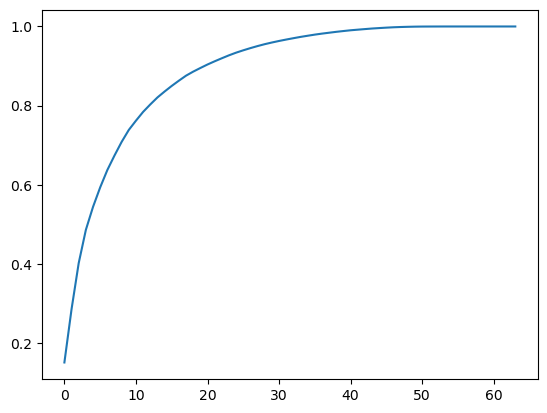

In [48]:
plt.plot(ratio_cum)
plt.show()

In [50]:
pca = PCA(20)
pca.fit(x_train)

PCA(n_components=20)

In [56]:
pca = PCA(0.9)
# 指定n_components = 0.9表示保留主成分直到累计方差解释率达到90%
pca.fit(x_train)

PCA(n_components=0.9)

In [58]:
pca.n_components_

21

In [62]:
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [64]:
x_train.shape,x_train_pca.shape

((1347, 64), (1347, 21))

### 模型训练

In [67]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver = 'saga',
                         # 选择适合大规模数据或复杂优化问题的求解器
                         tol = 0.001,
                         # 设置迭代停止的容忍度，当损失函数变化小于该值时终止迭代
                         max_iter = 500,
                         # 限制最大迭代次数，避免因无法收敛而过度计算
                        random_state = 86)